# Introduction to the Data Set

In [1]:
import pandas as pd

cars = pd.read_csv("imports-85.data")
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It looks like there are problems with columns names. We need to fix this.

In [2]:
cols = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

symboling, wheel_base, length, width, height, curb_weights, engine_size, compression_ratio, city_mpg, highway_mpg can be used as numeric features, price is the target column

In [4]:
# Lets select only the numeric columns
numeric_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = cars[numeric_cols]
cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning

In [5]:
cars.dtypes

normalized_losses     object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [6]:
import numpy as np
cars = cars.replace("?", np.nan)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [7]:
cars = cars.astype('float')

In [8]:
# Lets see how many missing values each column has
cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [9]:
cars = cars.dropna(subset=['price'])
cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [10]:
cars = cars.fillna(cars.mean())
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 23.6 KB


In [11]:
normalized_cars = (cars - cars.mean()) / cars.std()
normalized_cars['price'] = cars['price']
normalized_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0


# Univariate Model

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    
    # Randomizing and reordering the rows
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Trainig a Holdout Validation Technique
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Predicting the price
    knn.fit(train_df[[train_col]], train_df[target_col])
    predicted_labels = knn.predict(test_df[[train_col]])
    
    # Calculate the error metric: RMSE
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [13]:
# Which columns performed the best?
rmse_results = {}
train_cols = cars.columns.drop('price')
train_cols

Index(['normalized_losses', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg'],
      dtype='object')

In [14]:
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars)
    rmse_results[col] = rmse_val
    
rmse_results

{'bore': 6795.3883115355857,
 'city_mpg': 4760.4498418773101,
 'compression_ratio': 6610.8121531591287,
 'curb_weight': 4445.1419203752348,
 'height': 8073.1197593196175,
 'highway_mpg': 4643.0462776752138,
 'horsepower': 4048.4377247389034,
 'length': 5428.8101014152007,
 'normalized_losses': 7339.6757551335368,
 'peak_rpm': 7649.1705640818227,
 'stroke': 7954.3010342434445,
 'wheel_base': 5460.8514583622418,
 'width': 4772.4591494395536}

In [15]:
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4048.437725
curb_weight          4445.141920
highway_mpg          4643.046278
city_mpg             4760.449842
width                4772.459149
length               5428.810101
wheel_base           5460.851458
compression_ratio    6610.812153
bore                 6795.388312
normalized_losses    7339.675755
peak_rpm             7649.170564
stroke               7954.301034
height               8073.119759
dtype: float64

In [16]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    
    # Randomizing and reordering the rows
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Trainig a Holdout Validation Technique
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses                                        

In [17]:
k_rmse_results = {}
train_cols = cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6795.3883115355857,
  7: 6896.5594996277259,
  9: 6882.8228150900222},
 'city_mpg': {1: 5901.1435743547636,
  3: 4608.1804463803974,
  5: 4760.4498418773101,
  7: 5218.8478256216049,
  9: 5446.82446248222},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb_weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4445.1419203752348,
  7: 4330.6081044180528,
  9: 4632.9252512130197},
 'height': {1: 8751.1600074074486,
  3: 8121.1651026045756,
  5: 8073.1197593196175,
  7: 7693.3026630981794,
  9: 7776.3968624188938},
 'highway_mpg': {1: 6025.5949667207387,
  3: 4671.3903897894661,
  5: 4643.0462776752138,
  7: 4792.4857559257971,
  9: 5227.3373815663726},
 'horsepower': {1: 4170.0548480378011,
  3: 4020.1054510029612,
  5: 4048.4377247389034,
  7: 4205.3935213758805,
  9: 4514.5046414780554},
 'length': {1: 4611.990241

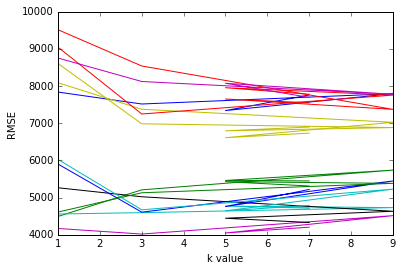

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [19]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4191.699237
width                4674.698766
curb_weight          4739.056704
highway_mpg          5071.970954
length               5173.087449
city_mpg             5187.089230
wheel_base           5269.898315
compression_ratio    7166.073599
bore                 7232.319720
normalized_losses    7649.281809
stroke               7955.585214
height               8083.028879
peak_rpm             8124.022815
dtype: float64

# Multivariate Model

In [20]:
def knn_train_test(train_cols, target_col, df):
    # Randomizing the reordering the rows
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Holdout Validation Technique
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        predicted_labels = knn.predict(test_df[train_cols])
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}


two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', cars)
k_rmse_results['two_best_features'] = rmse_val

In [21]:
three_best_features = ['horsepower', 'width', 'curb_weight']
rmse_val = knn_train_test(two_best_features, 'price', cars)
k_rmse_results['three_best_features'] = rmse_val

In [22]:
four_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg']
rmse_val = knn_train_test(four_best_features, 'price', cars)
k_rmse_results["four_best_features"] = rmse_val

In [23]:
five_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg']
rmse_val = knn_train_test(five_best_features, 'price', cars)
k_rmse_results["five_best_features"] = rmse_val

In [24]:
k_rmse_results

{'five_best_features': {5: 4010.5459225930481},
 'four_best_features': {5: 4010.4497757189724},
 'three_best_features': {5: 3800.4843868972157},
 'two_best_features': {5: 3800.4843868972157}}

# Hyperparameter Tuning

In [25]:
def knn_train_test(train_cols, target_col, df):
    # Randomizing the reordering the rows
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Holdout Validation Technique
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        predicted_labels = knn.predict(test_df[train_cols])
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}


three_best_features = ['horsepower', 'width', 'curb_weight']
rmse_val = knn_train_test(three_best_features, 'price', cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg']
rmse_val = knn_train_test(four_best_features, 'price', cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg']
rmse_val = knn_train_test(five_best_features, 'price', cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 4509.3691640212537,
  2: 4343.7870753457282,
  3: 3977.908680003432,
  4: 4073.0060103559927,
  5: 4010.5459225930481,
  6: 3987.8602144425763,
  7: 4093.0095425958834,
  8: 4238.820406831077,
  9: 4484.8256092501133,
  10: 4481.4456288077845,
  11: 4645.9924281402964,
  12: 4713.1494644279419,
  13: 4846.1471901693922,
  14: 4921.5277524889461,
  15: 4961.8463188407177,
  16: 4968.4193829073301,
  17: 5026.37286915812,
  18: 5108.3859557209717,
  19: 5127.2052828333799,
  20: 5196.7478179593581,
  21: 5195.5862911473441,
  22: 5153.4781023029927,
  23: 5211.8611050551099,
  24: 5206.698186708858},
 'four best features': {1: 4516.3372524887709,
  2: 4319.9913351925388,
  3: 3980.1625695828093,
  4: 4082.4237203589614,
  5: 4010.4497757189724,
  6: 3986.8861205355252,
  7: 4093.0566216683919,
  8: 4238.5348465137558,
  9: 4484.7028371823653,
  10: 4478.9849653356696,
  11: 4645.8214443615125,
  12: 4712.9289934678354,
  13: 4846.2878174400103,
  14: 4929.19159

For the five_best_features, when k=1, the rmse has the lowest value(4509). For the four_best_features, when k=3, the rmse has the lowest value(3980). For the three_best_features, when k=1, the rmse has the lowest value(3981).

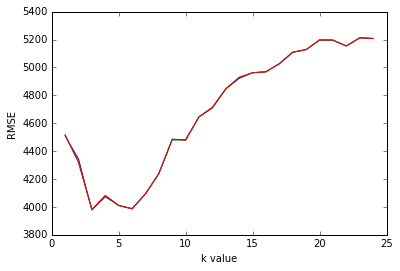

In [26]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')